# Import Library yang dibutuhkan

In [64]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt

# Load Dataset

In [65]:
#  Memuat dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocessing

In [66]:
# Normalisasi gambar
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [67]:
# Mengonversi label ke bentuk kategorikal
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Bangun Model CNN

In [68]:
model = tf.keras.Sequential([
    # Layer konvolusi pertama
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Layer konvolusi kedua
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Layer konvolusi ketiga
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flattening output untuk menginputkannya ke dalam Dense layer
    tf.keras.layers.Flatten(),

    # Dense layer dengan Dropout
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Layer output
    tf.keras.layers.Dense(10, activation='softmax') # dikarenakan ada 10 kelas
])

# Menampilkan ringkasan model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 2, 2, 128)        

# Kompilasi model

In [69]:
# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih Model

In [70]:
# Melatih model (hanya jika model belum dilatih sebelumnya)
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/10
782/782 [==============================] - 12s 14ms/step - loss: 1.7036 - accuracy: 0.3673 - val_loss: 1.3182 - val_accuracy: 0.5288
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 1.3314 - accuracy: 0.5233 - val_loss: 1.2275 - val_accuracy: 0.5696
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 1.1800 - accuracy: 0.5839 - val_loss: 1.0687 - val_accuracy: 0.6231
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 1.0806 - accuracy: 0.6237 - val_loss: 1.0096 - val_accuracy: 0.6429
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 0.9895 - accuracy: 0.6541 - val_loss: 0.9259 - val_accuracy: 0.6740
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 0.9280 - accuracy: 0.6782 - val_loss: 0.9022 - val_accuracy: 0.6813
Epoch 7/10
782/782 [==============================] - 10s 13ms/step - loss: 0.8664 - accuracy: 0.6992 - val_loss: 0.8604 - val_accuracy:

# Evaluasi Model

In [71]:
# Evaluasi model pada data tes
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.8278 - accuracy: 0.7114
Test accuracy: 0.7113999724388123


# Simpan Model ke file H5

In [72]:
# Menyimpan model ke file .h5
model.save('model_CIFAR.h5')
print("Model saved as 'model_CIFAR.h5'")

Model saved as 'model_CIFAR.h5'


# Menampilkan visualisasi

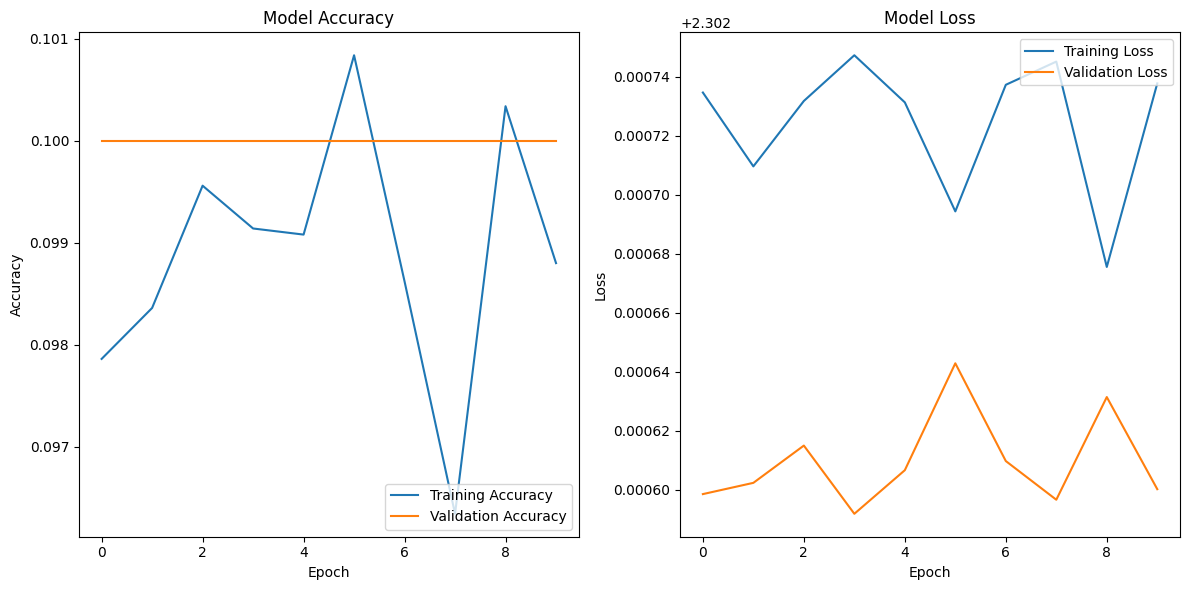

In [73]:
# Menampilkan grafik akurasi dan loss
plt.figure(figsize=(12, 6))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Menampilkan grafik
plt.tight_layout()
plt.show()